<a href="https://colab.research.google.com/github/Karthikard/ML/blob/main/24_KNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [2]:
import pandas as pd
df = pd.DataFrame(iris.data , columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
df['target']  = iris.target

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
df.shape

(150, 5)

In [10]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [11]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [12]:
import matplotlib.pyplot as plt

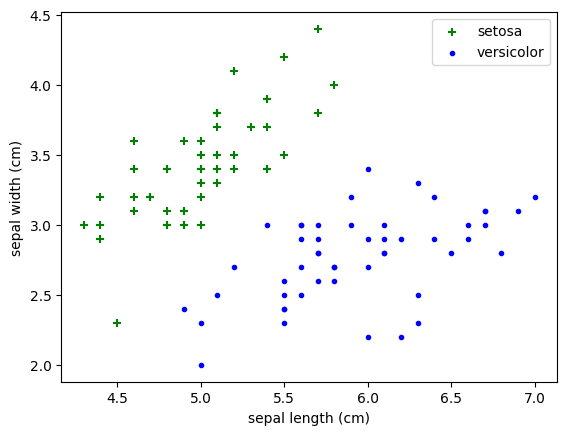

In [14]:
#sepal len vs sepal width (setosa vs versicolor)
plt.scatter(df0['sepal length (cm)'] , df0['sepal width (cm)'] , color='green' , marker='+')
plt.scatter(df1['sepal length (cm)'] , df1['sepal width (cm)'] , color='blue' , marker='.')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(['setosa' , 'versicolor'])
plt.show()

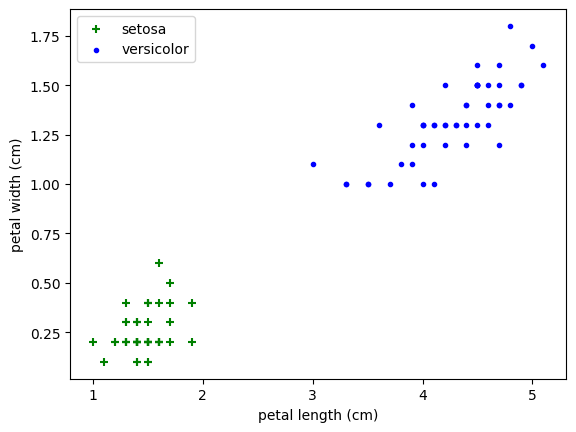

In [16]:
#Petal len Vs Petal width (Setosa Vs versicolor)
plt.scatter(df0['petal length (cm)'] , df0['petal width (cm)'] , color='green' , marker='+')
plt.scatter(df1['petal length (cm)'] , df1['petal width (cm)'] , color='blue' , marker='.')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(['setosa' , 'versicolor'])
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'] , axis='columns') , df.target , test_size=0.2 , random_state=10)

In [19]:
len(X_train)

120

In [20]:
len(X_test)

30

Create KNN classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [28]:
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [29]:
knn.score(X_test , y_test)

0.9666666666666667

confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix
y_predicted = knn.predict(X_test)
cm = confusion_matrix(y_test , y_predicted)
cm

array([[10,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  7]])

Text(95.72222222222221, 0.5, 'Truth')

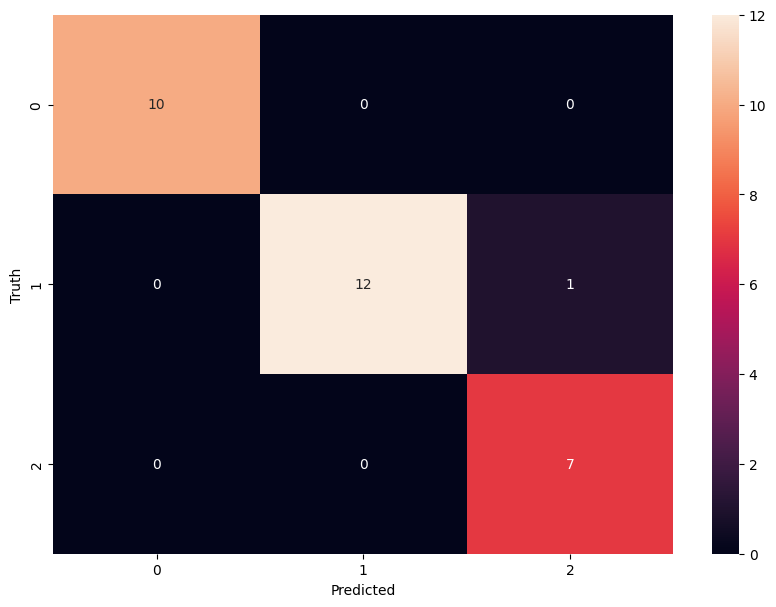

In [31]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm , annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

